100%|██████████| 4000/4000 [00:23<00:00, 170.45it/s]


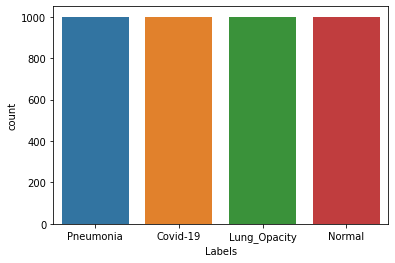

Covid-19: 1000
Normal: 1000
Pneumonia:  1000
Lung_Opacity:  1000


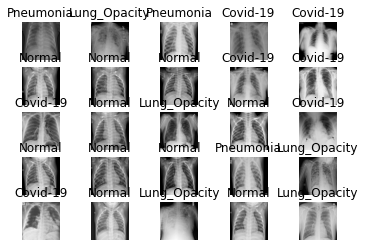

['Covid-19' 'Lung_Opacity' 'Normal' 'Pneumonia']
[0. 0. 0. 1.]
(3200, 150, 150, 3)
(800, 150, 150, 3)
(3200, 4)
(800, 4)
83689472/83683744 [==============================] - 1s 0us/step
The following Variables were used a Lambda layer's call (tf.nn.convolution), but
are not present in its tracked objects:
  <tf.Variable 'block1_conv1/kernel:0' shape=(3, 3, 3, 32) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.compat.v1.nn.fused_batch_norm), but
are not present in its tracked objects:
  <tf.Variable 'block1_conv1_bn/gamma:0' shape=(32,) dtype=float32>
  <tf.Variable 'block1_conv1_bn/beta:0' shape=(32,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a

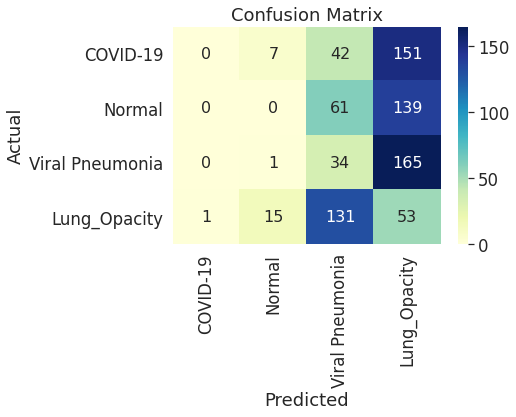

##### Plot the training loss and accuracy #####
Epoch 1/10
80/80 [==============================] - 895s 11s/step - loss: 0.4068 - acc: 0.6200 - val_loss: 0.3233 - val_acc: 0.7013
Epoch 2/10
80/80 [==============================] - 900s 11s/step - loss: 0.2890 - acc: 0.7622 - val_loss: 0.2973 - val_acc: 0.7362
Epoch 3/10
80/80 [==============================] - 898s 11s/step - loss: 0.2511 - acc: 0.8066 - val_loss: 0.2381 - val_acc: 0.8200
Epoch 4/10
80/80 [==============================] - 879s 11s/step - loss: 0.2327 - acc: 0.8203 - val_loss: 0.2051 - val_acc: 0.8575
Epoch 5/10
80/80 [==============================] - 881s 11s/step - loss: 0.2126 - acc: 0.8406 - val_loss: 0.1955 - val_acc: 0.8612
Epoch 6/10
80/80 [==============================] - 893s 11s/step - loss: 0.2035 - acc: 0.8453 - val_loss: 0.1828 - val_acc: 0.8587
Epoch 7/10
80/80 [==============================] - 899s 11s/step - loss: 0.1997 - acc: 0.8481 - val_loss: 0.1772 - val_acc: 0.8712
Epoch 8/10
80/80 [==========

<Figure size 432x288 with 0 Axes>

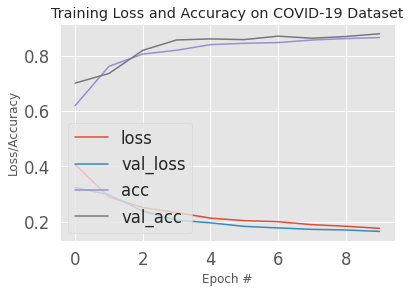

<Figure size 432x288 with 0 Axes>

In [2]:
# -*- coding: utf-8 -*-

#Code : https://www.kaggle.com/xiuchengwang/keras-xception-fine-turning-facol-loss
"""classification-of-covid-19-using-cnn.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1Rh1PQmp3fvMAuhML_k2HUQ2qq21nSg-E
"""

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: 
# https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) 
# will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames
          #print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) 
# that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, 
# but they won't be saved outside of the current session

"""# import Libraries"""
"""# import Libraries"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
import cv2, os, gc, glob
from tqdm import tqdm

from tensorflow.keras import layers, models

import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

#      DATA PREPARATION   ######
"""# ****Explorer****"""
'''
os.listdir('/kaggle/input')

os.listdir('/kaggle/input/covid19-radiography-database')

os.listdir('/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database')
'''
#os.listdir('D:/Image Procesing code model data/Covid19 Analysis model/CNN/COVID-19_Radiography_Dataset')
os.listdir('/content/drive/MyDrive/DATA/IMAGE/COVID-19_Radiography_Dataset')
#D:/DOWNLOAD/Covid19 Analysis model/CNN/COVID-19_Radiography_Dataset
# Image paths

imagePaths = []
#for dirname, _, filenames in os.walk('/kaggle/input'):
#for dirname, _, filenames in os.walk('D:/Image Procesing code model data/Covid19 Analysis model/CNN/COVID-19_Radiography_Dataset'): 
for dirname, _, filenames in os.walk('/content/drive/MyDrive/DATA/IMAGE/COVID-19_Radiography_Dataset'):   
    for filename in filenames:
        if (filename[-3:] == 'png'):
            imagePaths.append(os.path.join(dirname, filename))

# Data - Label

Data = []
Target = []
resize = 150
#cat = {'Viral Pneumonia': 'Pneumonia', 'NORMAL': 'Normal', 'COVID-19': 'Covid-19'}
cat = {'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid-19', 'Lung_Opacity': 'Lung_Opacity'}

for imagePath in tqdm(imagePaths):
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (resize, resize)) /255

    Data.append(image)
    Target.append(cat[label])

# Count by Label

df = pd.DataFrame(Target,columns=['Labels'])
sns.countplot(df['Labels'])
#plt.figure(figsize=(20,20))
plt.show()
plt.savefig("ClassLevelplot.png")

print('Covid-19:',Target.count('Covid-19'))
print('Normal:',Target.count('Normal'))
print('Pneumonia: ',Target.count('Pneumonia'))
print('Lung_Opacity: ',Target.count('Lung_Opacity'))


# Images shape

size = []
for file in imagePaths: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

# Show Images

#plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(imagePaths),25))) : 
    plt.subplot(5,5,n+1)
    plt.imshow(Data[i] , cmap='gray')
    plt.title(Target[i])
    plt.axis('off')     
plt.show()
plt.savefig("ImageCategoryplot.png")

"""# Prepare Data"""

# encode labels as integers

le = LabelEncoder()
labels = le.fit_transform(Target)
labels = to_categorical(labels)

print(le.classes_)
print(labels[0])

# split Data

(x_train, x_test, y_train, y_test) = train_test_split(Data, labels,test_size=0.20,
                                                      stratify=labels,random_state=42)

trainX = np.array(x_train)
testX = np.array(x_test)
trainY = np.array(y_train)
testY = np.array(y_test)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

trainX[0]
######## End of data preparation #############
'''
        loss='binary_crossentropy',
        optimizer=Adam(lr=0.00005),
        metrics=['accuracy']
model = build_model()
model.summary()
'''

## Xception model #########
import matplotlib.pyplot as plt
import random
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import os
import tensorflow
import keras.backend as K
from tensorflow.keras.applications import Xception
from keras.layers import UpSampling2D, Conv2D, Activation, LeakyReLU, BatchNormalization
from keras import Model
from keras.losses import binary_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tqdm import tqdm_notebook
from tensorflow.keras import layers

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import *
from keras.applications import *
from keras.callbacks import ModelCheckpoint
from keras import metrics
from keras.optimizers import Adam 
from keras import backend as K
import keras
from keras.models import Model
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import skimage.io
#from skimage.transform import resize
#from imgaug import augmenters as iaa
from tqdm import tqdm
import PIL
from PIL import Image
import cv2
from sklearn.utils import class_weight, shuffle
from keras.losses import binary_crossentropy
import keras.backend as K
import tensorflow as tf
from sklearn.metrics import f1_score, fbeta_score
#from keras.utils import Sequence
#import skimage.io
WORKERS = 2
CHANNEL = 3

import warnings
warnings.filterwarnings("ignore")
SIZE = 150#156
NUM_CLASSES = 4
beta_f2=2

import warnings
warnings.filterwarnings("ignore")
SIZE = 150
#NUM_CLASSES = 4
beta_f2=2


def create_model(input_shape):
    input_tensor = Input(shape=input_shape)
    base_model = Xception(include_top=False,
                   weights='imagenet',
                   input_shape=input_shape) 
    bn = BatchNormalization()(input_tensor)
    x = base_model(bn)
    x = GlobalAveragePooling2D()(x)
    x = Dense(1056, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(4, activation='sigmoid')(x)
    model = Model(input_tensor, output)
    
    return model
model = create_model(input_shape=(SIZE,SIZE,3))
#model = create_model(input_shape=(SIZE,SIZE,3), n_out=28)
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.00005), metrics=['acc'])

'''
def create_model(input_shape, n_out):
    input_tensor = Input(shape=input_shape)
    base_model = Xception(include_top=False,
                   weights=None,
                   input_tensor=input_tensor)
    #base_model.load_weights('xception_weights_tf_dim_ordering_tf_kernels_notop.h5')
    base_model.load_weights('/content/drive/MyDrive/DATA/IMAGE/6.Xeption Weight loaded/xception_weights_tf_dim_ordering_tf_kernels_notop.h5')
    
#     x = Conv2D(32, kernel_size=(1,1), activation='relu')(base_model.output)
#     x = Flatten()(x)
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.5)(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    final_output = Dense(n_out, activation='sigmoid', name='final_output')(x)
    model = Model(input_tensor, final_output)
    return model

# warm up model
model = create_model(
    input_shape=(SIZE,SIZE,3), 
    n_out=NUM_CLASSES)

for layer in model.layers:
    layer.trainable = False

for i in range(-5,0):
    model.layers[i].trainable = True
'''
'''
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(1e-3))


model = Model(base_model.input, conv1)
        loss='binary_crossentropy',
        optimizer=Adam(lr=0.00005),
        metrics=['accuracy']
'''


#model = Model(base_model.input, conv1)
#model.compile(loss=bce_dice_loss, optimizer='adam', metrics=[iou_metric])
#model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.00005), metrics=['acc'])


#  RESULT ANALYSIS SECTION

modelLoss, modelAccuracy = model.evaluate(testX, testY, verbose=0)

print('Test Loss is {}'.format(modelLoss))
print('Test Accuracy is {}'.format(modelAccuracy ))

class_names = ['COVID-19','Normal','Viral Pneumonia', 'Lung_Opacity']
cat = {'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid-19', 'Lung_Opacity': 'Lung_Opacity'}
y_pred = model.predict(testX)
print(class_names[np.argmax(y_pred[1])])

# classification report on train
batch_size=40
epochs=10
print("Train classification report on train data section")
predIdxs = model.predict (trainX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

# classification report on test

print("Test classification report on test data section")
predIdxs = model.predict(testX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

# Plotting Confusion Matrix
x = confusion_matrix(testY.argmax(axis=1),y_pred.argmax(axis=1))
Confusion_Matrix = pd.DataFrame(x, index=class_names, columns=class_names)

sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(Confusion_Matrix, annot=True, annot_kws={'size':16}, fmt='d', cmap='YlGnBu')

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title('Confusion Matrix')
plt.show()
plt.savefig("Confusion Matrix plot.png")

#model.save('CNN_Covid19_Xray_V1.h5')


#'''Visualization'''
# plot the training loss and accuracy
print("##### Plot the training loss and accuracy #####")
trainAug = ImageDataGenerator(rotation_range=15, fill_mode="nearest")
H = model.fit_generator(
    trainAug.flow(trainX, trainY, batch_size=batch_size),
    steps_per_epoch=len(trainX) // batch_size,
    validation_data=(testX, testY),
    validation_steps=len(testX) // batch_size,
    epochs=epochs)

#N = EPOCHS
N=epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()
plt.savefig("Acc Loss plot.png")



